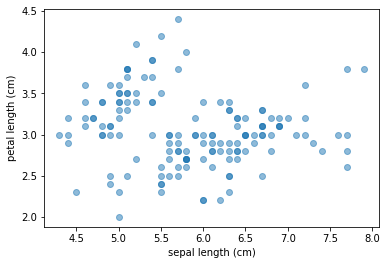

In [30]:
import matplotlib.pyplot as plt
from sklearn import datasets 

iris = datasets.load_iris()


samples = iris.data

x = samples[:,0]
y = samples[:,1]

plt.scatter(x, y, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

plt.show()

Implementing K-Means: Step 1
The K-Means algorithm:

Place k random centroids for the initial clusters.
Assign data samples to the nearest centroid.
Update centroids based on the above-assigned data samples.

Repeat Steps 2 and 3 until convergence.

[[7.53450279 3.28247763]
 [5.3698937  3.72352426]
 [4.96421297 2.34156218]]


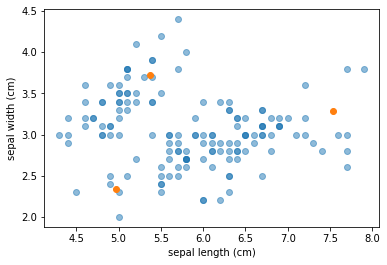

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

combined = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

print(centroids)

plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()


In [32]:
# Step 2: Assign samples to nearest centroid

# Distance formula

def distance(a, b):
  one = (a[0] - b[0]) **2
  two = (a[1] - b[1]) **2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)

labels = np.zeros(len(samples))

# Distances to each centroid

distances = np.zeros(k)

# Assign to the closest centroid

for i in range(len(samples)):
  distances[0] = distance(sepal_length_width[i], centroids[0])
  distances[1] = distance(sepal_length_width[i], centroids[1])
  distances[2] = distance(sepal_length_width[i], centroids[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

# Print labels

print(labels)

[1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 1.
 1. 1. 0. 0. 0. 2. 0. 2. 1. 2. 0. 2. 2. 1. 2. 1. 2. 0. 1. 2. 2. 2. 1. 1.
 2. 1. 0. 0. 0. 0. 1. 2. 2. 2. 2. 2. 1. 1. 0. 2. 1. 2. 2. 1. 2. 2. 2. 1.
 1. 1. 2. 2. 1. 2. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 2. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 2. 0. 1. 0. 1. 0. 0. 0. 2. 0.
 0. 0. 2. 0. 1. 1.]


In [33]:
from copy import deepcopy

# Step 3: Update centroids

centroids_old = deepcopy(centroids)

for i in range(k):
  points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
  centroids[i] = np.mean(points, axis=0)
  
print(centroids_old)
print("- - - - - - - - - - - - - -")
print(centroids)

[[7.53450279 3.28247763]
 [5.3698937  3.72352426]
 [4.96421297 2.34156218]]
- - - - - - - - - - - - - -
[[6.8627907  3.04418605]
 [5.47377049 3.36557377]
 [5.38043478 2.66086957]]


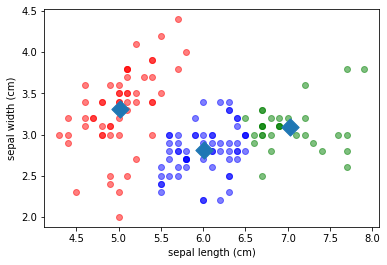

In [34]:
#Here I repeatedly execute Step 2 and 3 until the centroids stabilize (convergence).

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

# Repeat Steps 2 and 3 until convergence:

while error.all() != 0:

  # Step 2: Assign samples to nearest centroid

  for i in range(len(samples)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances)
    labels[i] = cluster

  # Step 3: Update centroids

  centroids_old = deepcopy(centroids)

  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1],   centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])

colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()